<a href="https://colab.research.google.com/github/KerliS9/Cientista-de-dados/blob/master/Cientista_de_Dados1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Kerli J Schroeder")
print("Mauricio F Gerardt")

Kerli J Schroeder
Mauricio F Gerardt


In [ ]:
import pandas as pd

Código para buscar a base a ser analisada. Esta busca no Panda.

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Buscando a base de dados dos filmes no formato cru.
Na 2a linha esta traduzindo para o portugues.

In [ ]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Buscando a base de dados das avaliações no formato cru.

In [ ]:
avaliacoes.shape

(100836, 4)

Quantidade de linhas e colunas da base analisada.

In [ ]:
avaliacoes.columns = ["usuarioId", "filmeId", "media", "momento"]
avaliacoes.head()

,usuarioId,filmeId,media,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Traduzindo do inglês para o português.

In [ ]:
avaliacoes.describe()

,usuarioId,filmeId,media,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Notas mínima e máxima que podem ser dado, média das notas e média aritmética das notas.

In [ ]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,media,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Analisando as cinco primeiras notas dadas ao filme 1.

In [ ]:
avaliacoes_do_filme_1["media"].mean()

3.9209302325581397

Nota do filme 1.

In [ ]:
media_do_filme = avaliacoes.groupby("filmeId")["media"].mean()
media_do_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: media, dtype: float64

Analisa todos os dados, destacando a coluna com o número do filme e sua média.
Na segunda linha é definido a extração dos cinco primeiros.

In [ ]:
filmes_com_media = filmes.join(media_do_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Busco as coluna nome do filme para indexar com número do filme.
Defino como variável.

In [ ]:
filmes_com_media.sort_values("media", ascending=False).head(15)

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Colocar os filmes em ordem decrescente de suas médias. Destacando os 15 primeiros filmes.

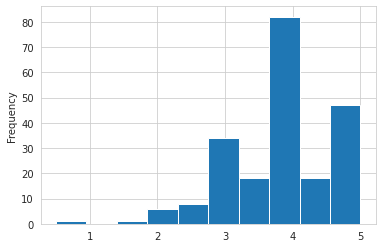

In [ ]:
avaliacoes.query("filmeId == 1")["media"].plot(kind='hist')

Com "filmeId in[1,2,102084]" separei todas as notas que estes filmes receberam.
ajustando o filmeId para 1, incluindo media e plotagem com histograma, é possível verficar qual a distribuição de notas.

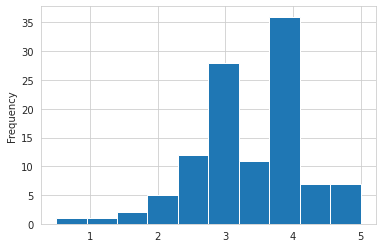

In [ ]:
avaliacoes.query("filmeId == 2")["media"].plot(kind='hist')

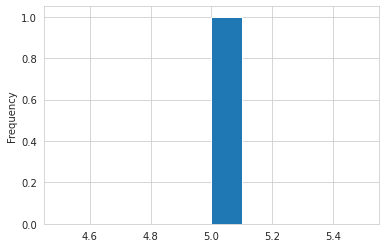

In [ ]:
avaliacoes.query("filmeId == 102084")["media"].plot(kind='hist')

In [ ]:
filmes["generos"].str.get_dummies("|").sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

quebra os gêneros de cada filme na informação |, transformando em 0 ou 1
depois soma a quantidade de vezes que aparece cada genêro.
axis=1, soma quantos generos de cada filme.
value_counts, soma quantidade filmes que possuem 2 generos e assim por diante.

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Sort_values, ajusto os generos por quantidade decrescente.

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Sort_index, ajusto os generos por ordem alfabética.

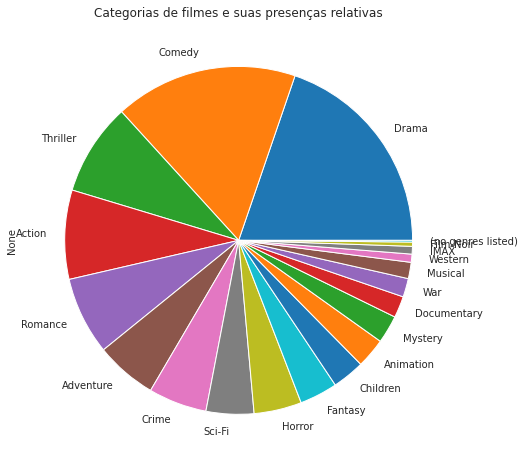

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind='pie', title='Categorias de filmes e suas presenças relativas',
                                                                               figsize=(8,8))
from matplotlib import pyplot as plt
plt.show()
                                                                    

plot, transforma a informação em gráfico.
pie é o tipo do gráfico. Inserido titulo e aumentando o tamanho do gráfico.

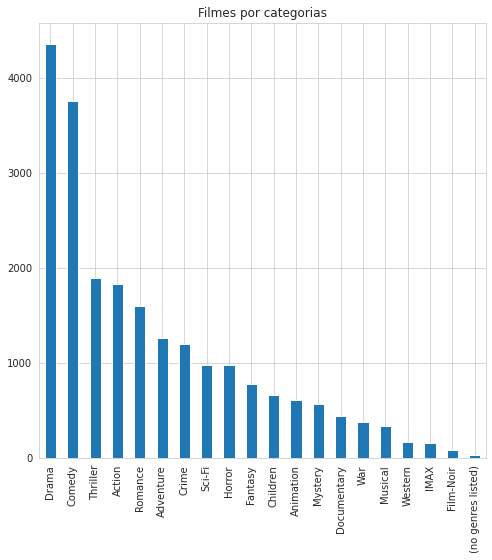

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind='bar', title='Filmes por categorias',
                                                                               figsize=(8,8))
plt.show()

Alterado o tipo de gráfico e título, pois agora apresenta números/quantidades.

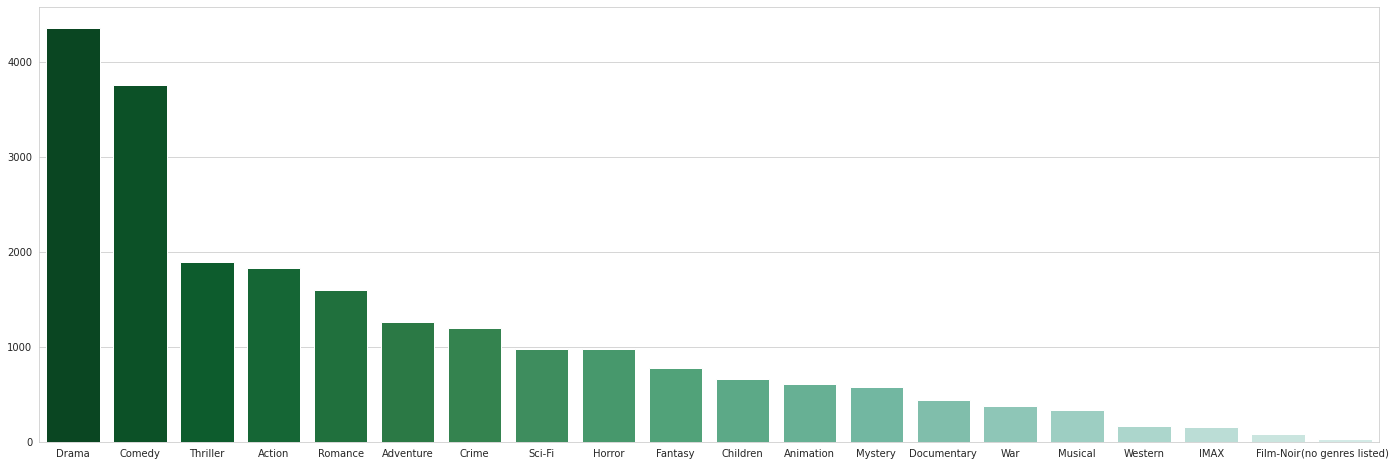

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(24,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+5))
plt.show()

Inseri um style para colocar a linha de referência ao fundo.
Define x e y, e organiza a análise com base no y
insere a paleta de cores desejada e acrescenta n_colors = a quantidade de dados do eixo x. Soma 5 ao final da paleta para intensificar a cor.

In [ ]:
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


3.9209302325581397


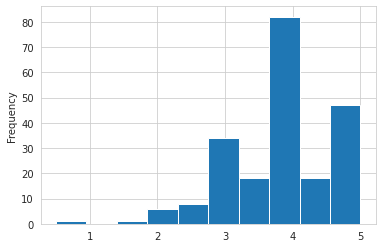

In [ ]:
nota_do_filme_1 = avaliacoes.query("filmeId==1")["media"]
print(nota_do_filme_1.mean())
nota_do_filme_1.plot(kind='hist')
plt.show()

3.4318181818181817


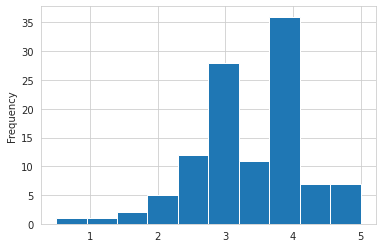

In [ ]:
nota_do_filme_1 = avaliacoes.query("filmeId==2")["media"]
print(nota_do_filme_1.mean())
nota_do_filme_1.plot(kind='hist')
plt.show()

In [ ]:
filmes_com_media.sort_values("media", ascending=False)[2450:2500]

,filmeId,titulo,generos,media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [ ]:
def plot_filme(n):
  media_do_filme = avaliacoes.query(f"filmeId=={n}")["media"]
  media_do_filme.plot(kind='hist')
  return media_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: media, dtype: float64

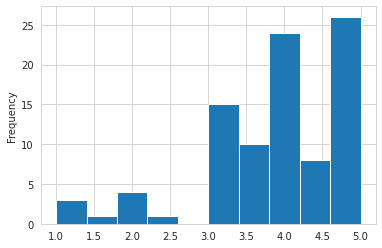

In [ ]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: media, dtype: float64

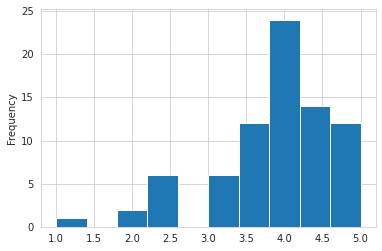

In [ ]:
plot_filme(46578)

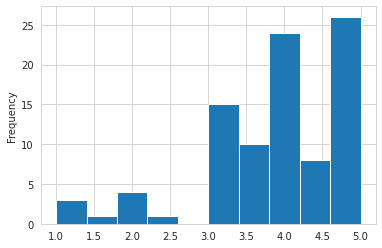

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: media, dtype: float64

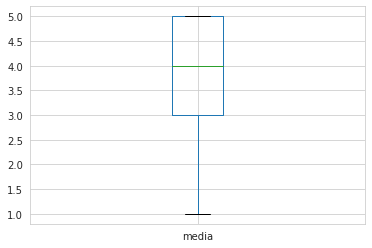

In [ ]:
def plot_filme(n):
  media_do_filme = avaliacoes.query(f"filmeId=={n}")["media"]
  media_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  media_do_filme.plot.box()
  return media_do_filme.describe()

plot_filme(919)

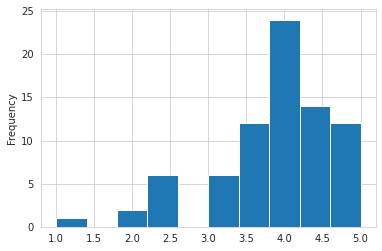

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: media, dtype: float64

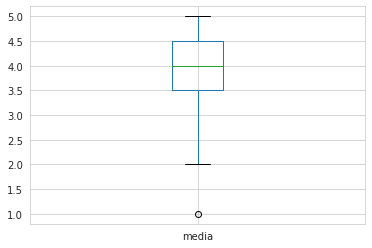

In [ ]:
plot_filme(46578)

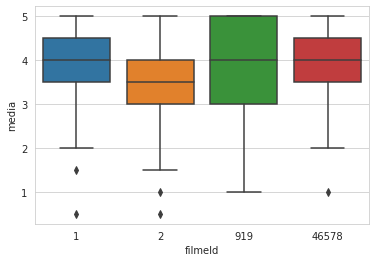

In [ ]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y = "media")
plt.show()

In [ ]:
selecao = filmes_com_media['media'].isnull()
filmes_com_media[selecao]

,filmeId,titulo,generos,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


AULA 1. Desafio 1 . Os filmes que não possuem nota. Rastreados por ISNULL.

In [ ]:
filmes_com_media = filmes_com_media.rename(columns={'media':'nota_media'})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


AULA 1. Desafio 2. Renomeando a coluna analisada. RENAME.

In [ ]:
total_votos_por_filme = avaliacoes.groupby('filmeId')['media'].count()
total_votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: media, dtype: int64

AULA 1. Desafio 3. Total de votos por filme.

In [ ]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'media': 'total_votos'})
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


AULA 1. Desafio 3. Total de votos incluídos na planilha.

In [ ]:
filmes_com_media_e_votos['nota_media'] = filmes_com_media_e_votos['nota_media'].round(2)
filmes_com_media_e_votos
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


AULA 1. Desafio 4. Arredondar as casas decimais para no máximo 2 décimos.

In [ ]:
generos_df = filmes_com_media_e_votos.generos.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

AULA 1. Desafio 5. Quais são os gêneros dos filmes.

In [ ]:
total_filmes_por_genero = filmes_com_media_e_votos.generos.str.get_dummies().sum().sort_values(ascending=False)
total_filmes_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

AULA 1. Desafio 6. Contar o número de aparições de cada genero.

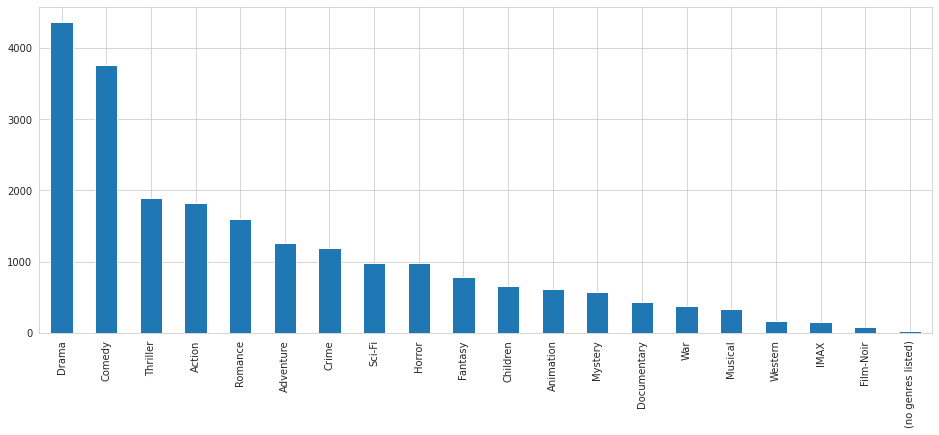

In [ ]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar',figsize=(16, 6))
plt.show()

AULA 1. Desafio 7. Plotar dados em gráfico ascendente.